In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [73]:
df = pd.read_csv("heart.csv", header=None)

In [74]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
df.columns = ['age',
              'sex',
              'cp',
              'trestbps',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'target'
              
    
]
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
X = df.drop('target',axis =1).copy()
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [77]:
Y = df['target'].copy()
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [78]:
X['cp'].unique()


array([3, 2, 1, 0], dtype=int64)

In [79]:
pd.get_dummies(X,columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_0,cp_1,cp_2,cp_3
0,63,1,145,233,1,0,150,0,2.3,0,0,1,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,0,2,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,2,0,2,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0


In [80]:
X_en = pd.get_dummies(X, columns=['cp',
                                 'restecg',
                                 'slope',
                                 'thal'])
X_en.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,0,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,0,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [81]:
Y.unique()

array([1, 0], dtype=int64)

In [82]:
Y_notzero = Y>0
Y[Y_notzero]=1
Y.unique()

array([1, 0], dtype=int64)

In [83]:
X_tarin , X_test , Y_train , Y_test ,=train_test_split(X_en,Y,random_state=42)


clf_df = DecisionTreeClassifier(random_state=42)
clf_df= clf_df.fit(X_tarin,Y_train)

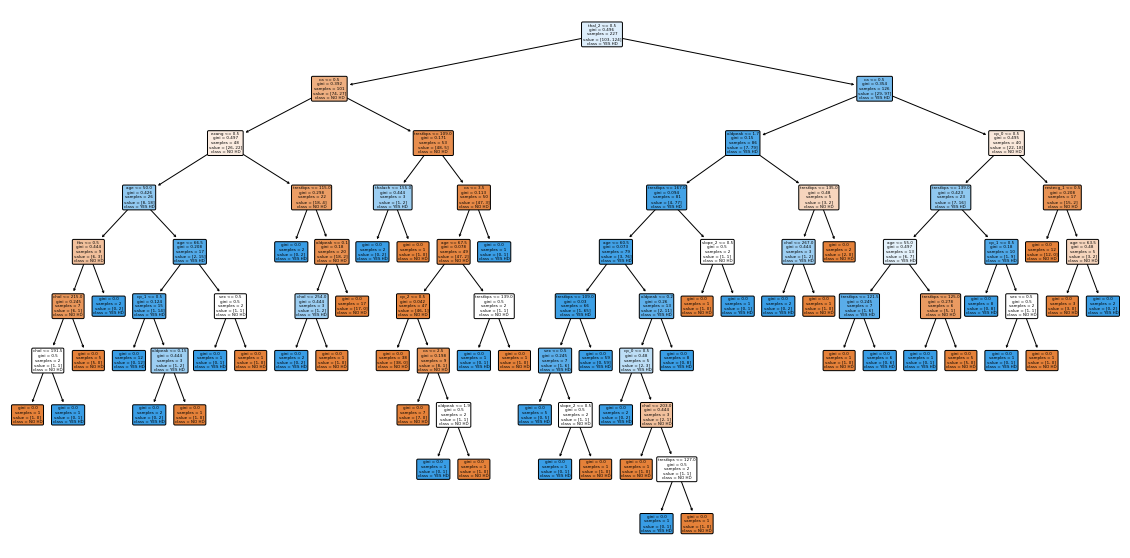

In [84]:
plt.figure(figsize=(20,10))
plot_tree(clf_df,
 filled=True,
 rounded=True,
 class_names=["NO HD","YES HD"],
  feature_names= X_en.columns);

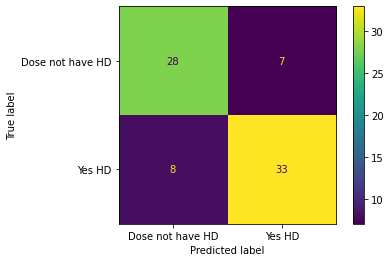

In [85]:
plot_confusion_matrix(clf_df,X_test,Y_test,display_labels=["Dose not have HD","Yes HD"])


In [86]:
path = clf_df.cost_complexity_pruning_path(X_tarin,Y_train)
ccp_alphas = path.ccp_alphas
# ccp_alphas = ccp_alphas[:,:-1]
ccp_alphas = ccp_alphas[:-1]

clf_dts = []

for ccp_alpha in ccp_alphas:
    clf_df = DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf_df.fit(X_tarin,Y_train)
    clf_dts.append(clf_df)


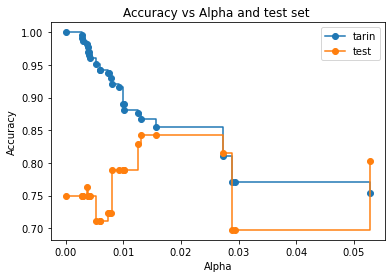

In [87]:
train_scores = [clf_df.score(X_tarin,Y_train)for clf_df in clf_dts]
test_scores = [clf_df.score(X_test,Y_test) for clf_df in clf_dts]
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Alpha and test set ")
ax.plot(ccp_alphas,train_scores, marker= 'o',label = 'tarin',drawstyle = 'steps-post')
ax.plot(ccp_alphas,test_scores, marker= 'o',label = 'test',drawstyle = 'steps-post')
ax.legend()
plt.show()